## Giriş Kavramları - Veri ile Tanışma
Makine Öğrenmesi aslıda Veriyi Anlama çabasıdır. Anlama ve Anlamlandırma.
Bu çabanın meyvesine Öğrenme (Learning) diyoruz ve öğrenme iki temel kategoride görülebilir:
* Supervised Learning (Gözetimli Öğrenme)
* Unsupervised Learning (Gözetimsiz Öğrenme)

**Supervised Learning:**

Gözetimli Öğrenmede, ne oldukları net olarak verilmiş girdiler kullanarak bir çıktı elde etmeye çalışırız.

Burada girdilerin aslında hangi çıktıya ait olduğu başta verilmiştir.

Bilmediğimiz ise yeni bir girdi geldiğinde, onun çıktısının ne olacağıdır.

İşte bunu tahminlemek için elimizdeki girdi-çıktı ilişkilerine bakarız.

**Unsupervised Learning:**

Gözetimsiz Öğrenmede elimizde girdiler vardır ancak çıktılar yoktur.

Hangi girdinin, hangi çıktıya karşılık geldiğini bilmeyiz.

Bu sebeple, çıktıyı tahmin etmeye çalışmak olanaksızdır.

Bunun yerine girdiler arasındaki ilişkiye odaklanırız.

Böylece kümeleme yaparak, hangi girdinin başka hangi girdi ile ilişkili olduğunu ve bu ilişkinin derecesini anlamaya çalışırız.

## Supervised Learning

**Örnek:**

**Maaş Verisi**

ABD Atlantik Bölgesindeki bir grup erkek çalışanlara ait maaş verisidir.

Bu veri setinde, `çalışanın maaşı` ile `yaşı`, `eğitim durumu` ve `tecrübe yılı` arasındaki ilişkiyi anlamaya çalışacağız.

In [1]:
# import
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Wage.csv")

In [3]:
df.describe()

,Unnamed: 0,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,218883.373000,2005.791000,42.414667,4.653905,111.703608
std,145654.072587,2.026167,11.542406,0.351753,41.728595
min,7373.000000,2003.000000,18.000000,3.000000,20.085537
25%,85622.250000,2004.000000,33.750000,4.447158,85.383940
50%,228799.500000,2006.000000,42.000000,4.653213,104.921507
75%,374759.500000,2008.000000,51.000000,4.857332,128.680488
max,453870.000000,2009.000000,80.000000,5.763128,318.342430


In [4]:
df.head(10)

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
5,376662,2008,54,1. Male,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.115744
6,450601,2009,44,1. Male,2. Married,4. Other,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.133021,169.528538
7,377954,2008,30,1. Male,1. Never Married,3. Asian,3. Some College,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.716003,111.720849
8,228963,2006,41,1. Male,1. Never Married,2. Black,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.778151,118.884359
9,81404,2004,52,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.857332,128.680488


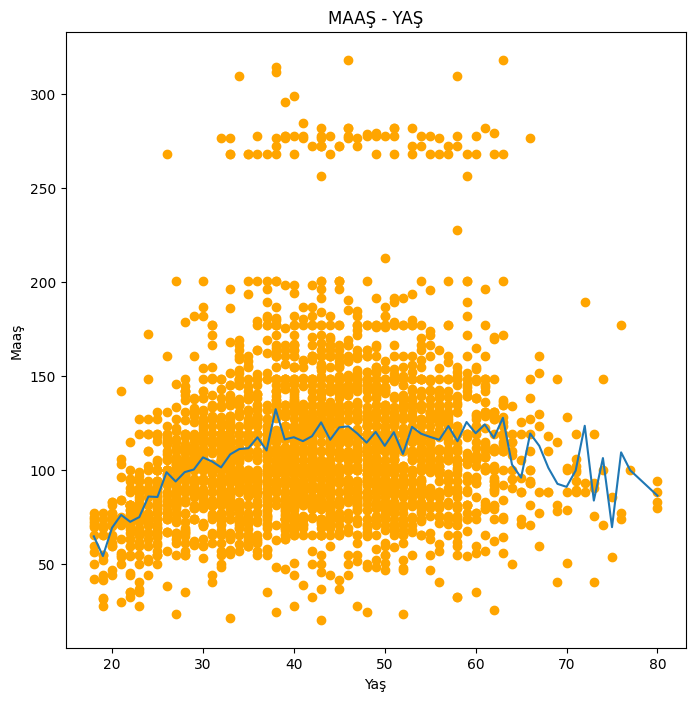

In [5]:
# MAAŞ - YAŞ

df1 = df[['age','wage']]

# girdi -> input,feature -> x
X = df1['age']

#çıktı -> output,label -> y
y = df1['wage']

#grafiği hazırla
fig, ax = plt.subplots(figsize=(8,8))

#datayı çiz
ax.scatter(X,y,color='orange')

#ortalama hesaplama
y_mean = df1.groupby("age").mean()

#ortlamayı çizelim
ax.plot(y_mean.index,y_mean)

#grafiği formatla
plt.title('MAAŞ - YAŞ')
plt.xlabel('Yaş')
plt.ylabel('Maaş')
plt.show()

In [6]:
y_mean

,wage
age,
18,64.493063
19,53.990486
20,69.033341
21,75.906952
22,72.251667
...,...
74,106.192881
75,69.389644
76,109.219665


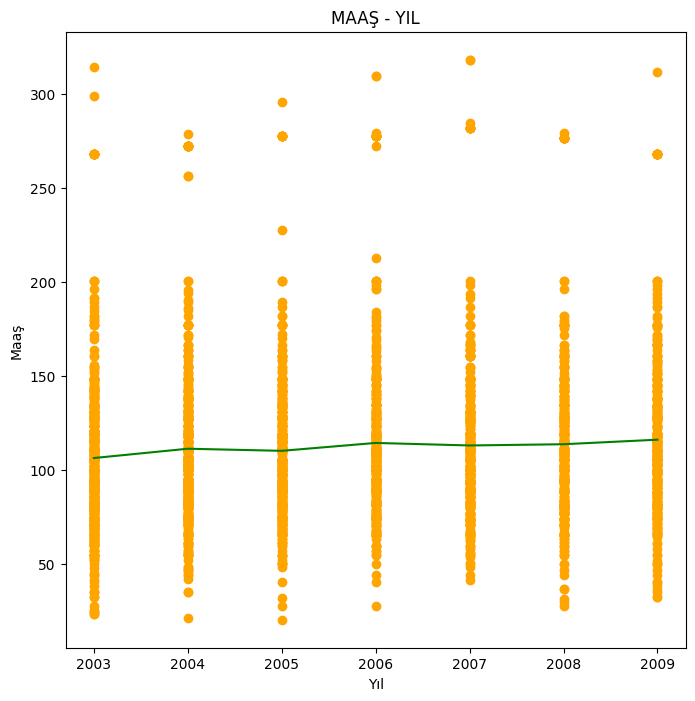

In [14]:
# MAAŞ - YIL

df2 = df[['year','wage']]

# girdi -> feature -> x
X = df2['year']

# çıktı -> output,label -> y
y = df2['wage']

#grafiği hazırla
fig,ax = plt.subplots(figsize=(8,8))

#ortalama hesaplama
y_mean = df2.groupby("year").mean()

#ortlamayı çizelim
ax.plot(y_mean.index,y_mean,color = 'green')

#datayı çiz
plt.scatter(X,y,color = 'orange')

#grafiği formatla
plt.title('MAAŞ - YIL')
plt.xlabel('Yıl')
plt.ylabel('Maaş')
plt.show()

<Axes: >

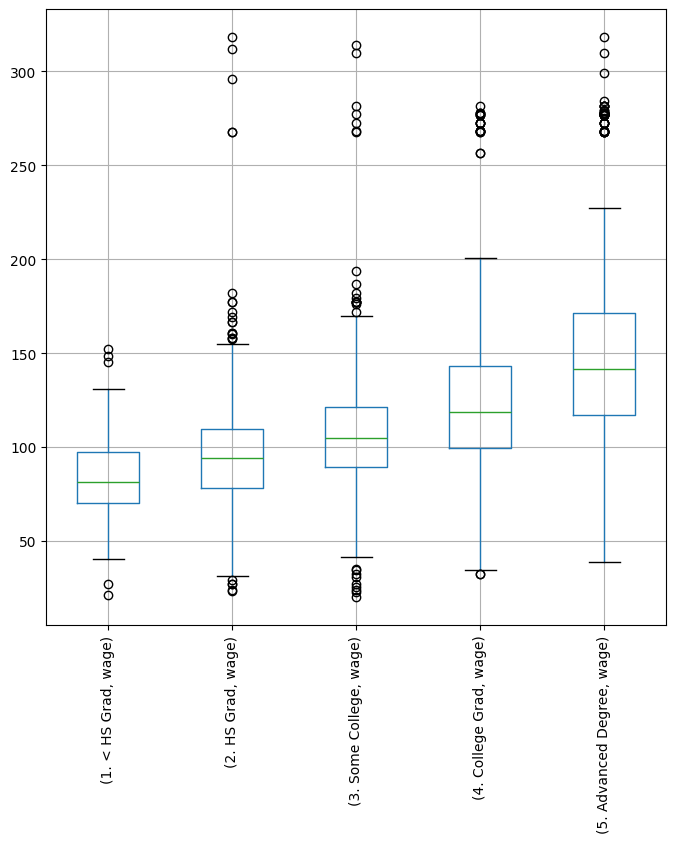

In [18]:
# MAAŞ - EĞİTİM DÜZEYİ
# boxplot

df3 = df[['education','wage']]

# girdi -> feature -> x
X = df3['education']

# çıktı -> output,label -> y
y = df3['wage']

# eğitim üzerinden gruplandır
y_grouped = df3.groupby('education')

y_grouped.boxplot(subplots=False,figsize=(8,8),rot=90)

#boxplot -> Quartile -> %25

### Hisse Senedi

**Örnek:**

**Hisse Senedi Piyasası**

Maaş Verilerinde sürekli/sayısal olan bir değişkeni tahmin etmeye çalıştık.

Fakat çoğu zaman sayısal olmayan, kategorik veriler üzerinde çalışırız.

Bu örneğimizde, Standard & Poor's 500 (S&P) indexinin 5 yıllık verisi üzerinde çalışacağız.

Amacımız, herhangi bir gün için index aşağı mı inecek, yoksa yukarı mı çıkacak bunu tahminlemek.

Dolayısı ile, sayısal bir sonuç bulmak değil, aşağı-yukarı şeklindeki iki kategoriden birini bulmak.

Maaş Verisi örneğimiz aslında bir Regresyon Analizi, Hisse Senedi ise bir Sınıflandırma (Classification).

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('Smarket.csv')

In [22]:
df.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [ ]:
# Bugünkü fiyat - Önceki gün Fiyatı
df4 = df[['Today','Direction']]

# girdi -> x
X = df4['Today']

# çıktı -> y
y = df4['Direction']